<a href="https://colab.research.google.com/github/Ame0thyst/liver-desease-predict/blob/main/training_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load dataset
# Gantilah 'dataset.csv' dengan nama file dataset Anda
df = pd.read_csv('/content/smote.csv')





In [2]:
df

,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240000,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176000,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236000,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280000,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
38951,0.506189,0.0,0.092493,0.178571,0.741085,0.039196,0.010978,0.420290,0.304348,0.120000,1.0
38952,0.697674,0.0,0.005856,0.005102,0.063431,0.006585,0.002161,0.531655,0.586957,0.372633,1.0
38953,0.357689,1.0,0.005362,0.005102,0.048852,0.004020,0.001830,0.521739,0.413043,0.200000,1.0
38954,0.674419,1.0,0.006702,0.005102,0.062042,0.015075,0.005082,0.666667,0.826087,0.600000,1.0


In [4]:
# Memeriksa jumlah nilai NaN di setiap kolom
print("Jumlah nilai NaN di setiap kolom:")
print(df.isna().sum())


Jumlah nilai NaN di setiap kolom:
age_of_the_patient                      0
gender_of_the_patient                   0
total_bilirubin                         0
direct_bilirubin                        0
alkphos_alkaline_phosphotase            0
sgpt_alamine_aminotransferase           0
sgot_aspartate_aminotransferase         0
total_protiens                          0
alb_albumin                             0
a_g_ratio_albumin_and_globulin_ratio    0
result                                  0
dtype: int64


In [5]:
# Misalkan fitur lainnya ada di semua kolom kecuali kolom 'Result'
X = df.drop(columns=['result'])  # semua kolom kecuali 'Result'
y = df['result']                  # kolom target 'Result'

# Memeriksa kelas unik di 'Result'
print("Kelas unik di 'Result':", np.unique(y))

# Jika kelas hanya 1 dan 2, kita dapat menggunakan multi:softmax
# Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Menentukan hyperparameter awal
params = {
    'objective': 'multi:softmax',  # untuk klasifikasi multikelas
    'num_class': len(np.unique(y)), # jumlah kelas unik dalam 'Result'
    'eval_metric': 'mlogloss',      # metrik untuk klasifikasi multikelas
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 2. Melatih model awal
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# 3. Evaluasi model awal
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model awal: {accuracy:.4f}')

# 4. Hyperparameter tuning dengan Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(**params),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=1,
                           n_jobs=-1)

# Melatih Grid Search
grid_search.fit(X_train, y_train)

# 5. Menampilkan hasil terbaik
print("Hasil terbaik dari Grid Search:")
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')

# 6. Evaluasi model terbaik di test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Akurasi model terbaik: {best_accuracy:.4f}')

Kelas unik di 'Result': [0. 1.]
Akurasi model awal: 0.9970
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Hasil terbaik dari Grid Search:
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.9996
Akurasi model terbaik: 0.9997


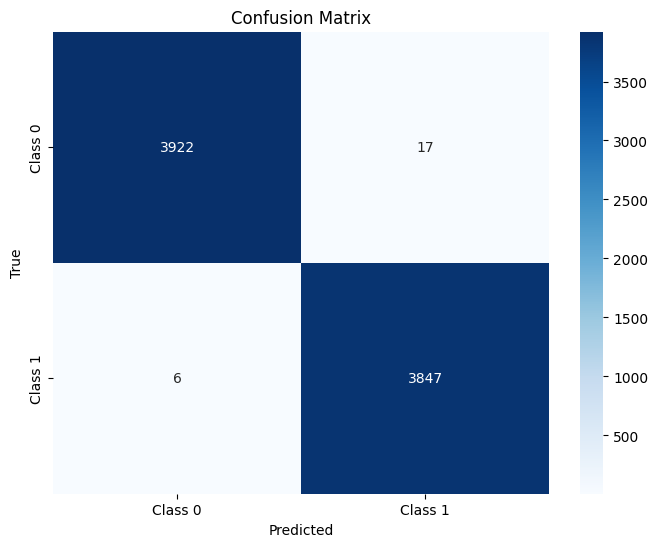

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3939
         1.0       1.00      1.00      1.00      3853

    accuracy                           1.00      7792
   macro avg       1.00      1.00      1.00      7792
weighted avg       1.00      1.00      1.00      7792



In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred))

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)


Akurasi: 0.9970482546201233
Precision: 0.9970523091633909
Recall: 0.9970482546201233
F1 Score: 0.9970482947322039
AUC: 0.9998765893079955


In [8]:
import pickle

In [9]:
filename = "liver_model_smote.sav"
pickle.dump(best_model, open(filename, 'wb'))

diantara ini aku masukin  visualisasi. kalau ga guna silahkan hapus.


In [ ]:
import joblib

# Menyimpan model yang sudah dilatih
joblib.dump(best_model, 'xgboost_model.pkl')



['xgboost_model.pkl']

In [ ]:
# Memuat model yang disimpan
loaded_model = joblib.load('xgboost_model.pkl')

# Menggunakan model untuk prediksi
y_pred_loaded = loaded_model.predict(X_test)


In [ ]:
import pickle

# Menyimpan model yang sudah dilatih
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [ ]:
# Memuat model yang disimpan
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Menggunakan model untuk prediksi
y_pred_loaded = loaded_model.predict(X_test)


In [ ]:
# Cek nama fitur dari model yang sudah dilatih
print(model.get_booster().feature_names)


['age_of_the_patient', 'gender_of_the_patient', 'total_bilirubin', 'direct_bilirubin', 'alkphos_alkaline_phosphotase', 'sgpt_alamine_aminotransferase', 'sgot_aspartate_aminotransferase', 'total_protiens', 'alb_albumin', 'a_g_ratio_albumin_and_globulin_ratio']


**# dengan scaler min max, jadi setiap ada inputan nantinya diharapkan data inputan baru tersebut juga di normalisasi dulu baru di prediksi.**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.metrics import accuracy_score

# Misalkan 'data' adalah DataFrame yang berisi data pelatihan Anda
# Fitur (X) dan target (y)
X = df.drop(columns=['result'])  # Semua kolom kecuali 'result'
y = df['result']  # Kolom target 'result'

# Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Melatih scaler dan mengubah data pelatihan

# Menyimpan scaler yang telah dilatih ke file
joblib.dump(scaler, 'scaler.pkl')  # Menyimpan scaler ke file

# Melatih model XGBoost
params = {
    'objective': 'binary:logistic',  # Untuk klasifikasi biner
    'eval_metric': 'logloss',  # Metrik untuk evaluasi
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model = xgb.XGBClassifier(**params)
model.fit(X_train_scaled, y_train)

# Menyimpan model yang telah dilatih ke file
joblib.dump(model, 'xgboost_model.pkl')  # Menyimpan model ke file

# Evaluasi model di data test
X_test_scaled = scaler.transform(X_test)  # Menormalisasi data test menggunakan scaler yang sudah dilatih
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.4f}')


Akurasi model: 0.9996


In [ ]:
import joblib
import numpy as np

# Memuat model dan scaler yang sudah disimpan
model = joblib.load('xgboost_model.pkl')  # Memuat model XGBoost yang sudah dilatih
scaler = joblib.load('scaler.pkl')  # Memuat scaler yang sudah dilatih

# Fungsi untuk prediksi
def predict_result(data):
    # Ubah data menjadi array 2D dan normalisasi dengan scaler
    data_scaled = scaler.transform(np.array(data).reshape(1, -1))  # Normalisasi data baru

    # Prediksi menggunakan model yang sudah dilatih
    prediction = model.predict(data_scaled)

    # Kembalikan hasil prediksi
    if prediction[0] == 0:
        return "Pasien tidak terkena kondisi (Result = 0)"
    else:
        return "Pasien terkena kondisi (Result = 1)"

# Contoh data baru untuk diuji (sesuaikan dengan fitur model Anda)
new_data = [65, 1, 0.9, 0.6, 200, 30, 10, 3, 4, 2]  # Gantilah dengan data baru sesuai dengan fitur Anda

# Panggil fungsi prediksi
result = predict_result(new_data)

# Cetak hasil prediksi
print('Hasil prediksi adalah:')
print(result)


Hasil prediksi adalah:
Pasien tidak terkena kondisi (Result = 0)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**yang ini dengan scaler + grid search untuk tuning**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.metrics import accuracy_score

# Misalkan df adalah DataFrame yang berisi data Anda
X = df.drop(columns=['result'])  # Semua kolom kecuali 'result'
y = df['result']  # Kolom target 'result'

# Memeriksa kelas unik di 'Result'
print("Kelas unik di 'Result':", np.unique(y))

# Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Normalisasi Data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Melatih scaler dan mengubah data pelatihan
X_test_scaled = scaler.transform(X_test)  # Menggunakan scaler yang sama untuk data test

# Menyimpan scaler ke file
joblib.dump(scaler, 'scaler.pkl')  # Menyimpan scaler ke file untuk digunakan di masa depan

# 2. Menentukan hyperparameter awal
params = {
    'objective': 'multi:softmax',  # Untuk klasifikasi multikelas
    'num_class': len(np.unique(y)), # Jumlah kelas unik dalam 'Result'
    'eval_metric': 'mlogloss',      # Metrik untuk klasifikasi multikelas
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 3. Melatih model awal
model = xgb.XGBClassifier(**params)
model.fit(X_train_scaled, y_train)

# 4. Evaluasi model awal
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model awal: {accuracy:.4f}')

# 5. Hyperparameter tuning menggunakan Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(**params),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=1,
                           n_jobs=-1)

# Melatih Grid Search
grid_search.fit(X_train_scaled, y_train)

# 6. Menampilkan hasil terbaik dari Grid Search
print("Hasil terbaik dari Grid Search:")
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')

# 7. Evaluasi model terbaik di test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Akurasi model terbaik: {best_accuracy:.4f}')

# 8. Menyimpan model terbaik ke file
joblib.dump(best_model, 'best_xgboost_model.pkl')  # Menyimpan model terbaik ke file


Kelas unik di 'Result': [0. 1.]
Akurasi model awal: 0.9993
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Hasil terbaik dari Grid Search:
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Best cross-validation score: 0.9999
Akurasi model terbaik: 0.9998


['best_xgboost_model.pkl']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize


In [ ]:
# Melakukan evaluasi model terbaik
y_pred_best = best_model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_best)

# Menghitung presisi (precision), recall, dan F1 score
precision = precision_score(y_test, y_pred_best, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_best, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_best, average='macro', zero_division=0)

# Menghitung AUC (Area Under Curve) - jika tasknya klasifikasi biner
if len(np.unique(y)) == 2:  # Jika ada dua kelas (klasifikasi biner)
    auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
else:
    # Untuk multi-class, kita harus binarize target label dan menghitung AUC untuk setiap kelas
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    auc = roc_auc_score(y_test_bin, best_model.predict_proba(X_test_scaled), average='macro', multi_class='ovr')

# Menampilkan metrik-metrik evaluasi
print(f'Akurasi: {accuracy:.4f}')
print(f'Presisi (Precision): {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')


Akurasi: 0.9998
Presisi (Precision): 0.9999
Recall: 0.9997
F1 Score: 0.9998
AUC: 0.9996


In [ ]:
import joblib
import numpy as np

def predict_with_model(data):
    # Memuat scaler yang telah disimpan
    scaler = joblib.load('scaler.pkl')

    # Memuat model terbaik yang telah disimpan
    model = joblib.load('best_xgboost_model.pkl')

    # Menormalisasi data input dengan scaler yang sama
    data_scaled = scaler.transform([data])  # Pastikan data dalam bentuk 2D

    # Melakukan prediksi dengan model yang sudah dilatih
    prediction = model.predict(data_scaled)

    # Mengembalikan hasil prediksi
    if prediction[0] == 0:
        return "Pasien tidak terkena diabetes"
    elif prediction[0] == 1:
        return "Pasien terkena diabetes"
    else:
        return "Kelas tidak dikenal"

# Contoh pengujian prediksi dengan satu data
new_data = [65, 1, 0.9, 0.6, 200, 30, 10, 3, 4, 2]  # Misalnya data input baru
result = predict_with_model(new_data)

# Cetak hasil prediksi
print('Hasil prediksi adalah:')
print(result)


Hasil prediksi adalah:
Pasien tidak terkena diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
